### IMDB EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

#Loading Data
df= pd.read_csv("C:\\Git & GitHub\\Projects\\Movie Rating Analysis\\imdb_top_1000_raw.csv")
df.head()

,title,genre,director,year,duration,rating,votes
0,Movie 1,"Drama, Sci-Fi, \N",Director C,2010,175,2.9,119761.0
1,Movie 2,"Romance, Sci-Fi",NaN,1955,two hours,2.6,463554.0
2,Movie 3,"Drama, , Sci-Fi",Director B,1980,139,1.6,235480.0
3,Movie 4,"\N, Thriller, Sci-Fi",Director C,2007,147,5.1,209000.0
4,Movie 5,Adventure,Director B,2014,104,7.7,260739.0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     1000 non-null   object 
 1   genre     963 non-null    object 
 2   director  674 non-null    object 
 3   year      988 non-null    object 
 4   duration  993 non-null    object 
 5   rating    891 non-null    float64
 6   votes     942 non-null    float64
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
df.isnull().sum()           #finding columns with null values

title         0
genre        37
director    326
year         12
duration      7
rating      109
votes        58
dtype: int64

In [5]:
# cleaning year column
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Cleaning duration column
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df = df.dropna(subset=['duration'])
df['duration'] = df['duration'].astype(int)

# cleaning rating and votes
df = df.dropna(subset=['rating', 'votes'])
df['votes'] = df['votes'].astype(int)

# cleaning genre
df['genre'] = df['genre'].fillna('Unknown')
df['genre'] = df['genre'].str.replace('\\N', 'Unknown', regex=False)
df['genre_list'] = df['genre'].str.split(', ')


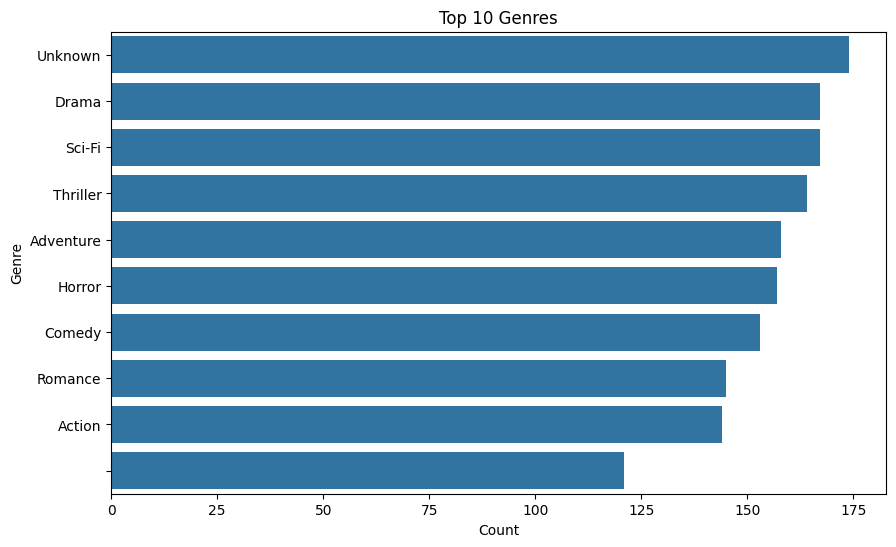

In [7]:
# Convert comma-separated string to separate rows
genres_expanded = df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_expanded.name = 'single_genre'

# Count each genre
genre_counts = genres_expanded.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts.head(10), x='Count', y='Genre')
plt.title("Top 10 Genres")
plt.show()


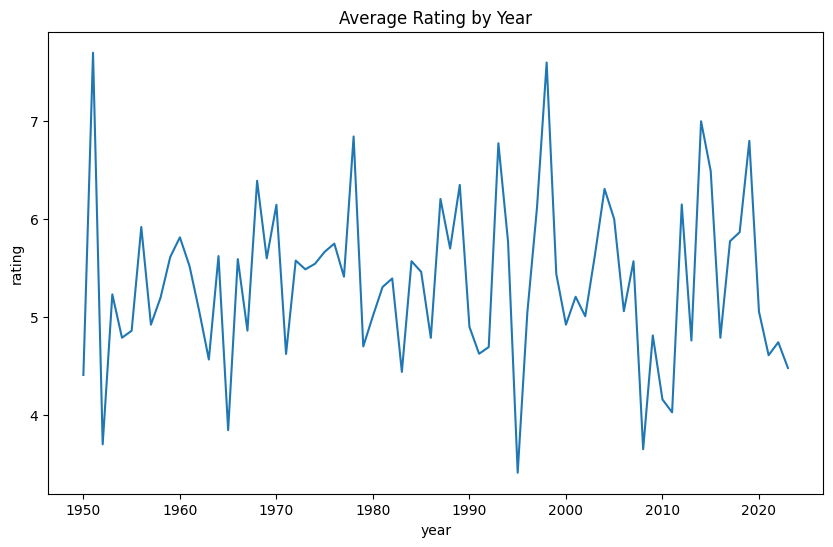

In [8]:
ratings_by_year = df.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=ratings_by_year, x='year', y='rating')
plt.title("Average Rating by Year")
plt.show()


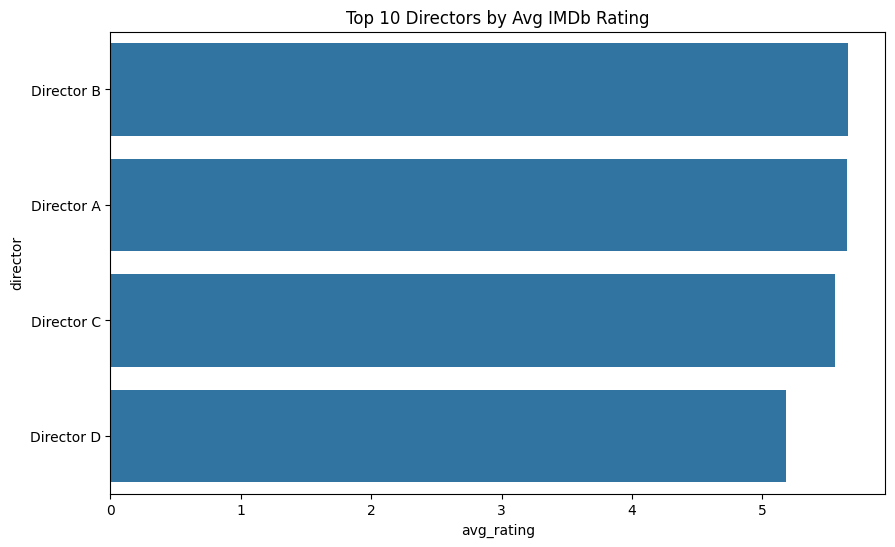

In [9]:
top_directors = df.groupby('director').agg(
    avg_rating=('rating', 'mean'),
    movie_count=('title', 'count')
).reset_index()

top_directors = top_directors.dropna().sort_values(by='avg_rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_directors, x='avg_rating', y='director')
plt.title("Top 10 Directors by Avg IMDb Rating")
plt.show()


In [10]:
df.to_csv("imdb_top_1000_cleaned.csv", index=False)


## Key Insights

- **Top Genres**: Action, Drama, and Comedy dominate the dataset.
- **Rating Trend**: Movie ratings show [increase/stability/decline] over time.
- **Directors**: [Top 3 names] have consistently high ratings.
